Ref.: https://www.kaggle.com/c/santander-customer-transaction-prediction

In [29]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score

In [2]:
# Configurando opção para mostrar todas as colunas do dataset
pd.set_option("display.max_columns", None)

In [3]:
# Lendo e verificando os dados de treino
df_train = pd.read_csv(r'train.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [6]:
df_train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

In [7]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [8]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Em resumo, este dataframe de treinamento (train.csv) é composto de 200k observações (transações) e 202 colunas, sendo:

- **ID_code** ->  código da observação (transação) -> object type
- **target** -> variável alvo a ser explicada, valendo 0 ou 1, com 10% de "1s" -> int type 
- **var_0 à var_199** -> 200 varaiáveis (features) explicativas - float type

De acordo com os resultados, a quantidade de dados obtidos para a variável target mostra um dataset não balanceado.

Para corrigir este desbalanceamento, utilizada a técnica de oversampling.

In [9]:
# Definição de dois DataFrames, um para variável target igual a "0s" e outro para "1s"
df_train_target0 = df_train[df_train.target == 0]
df_train_target1 = df_train[df_train.target == 1]

print(df_train_target0.shape, df_train_target1.shape)

(179902, 202) (20098, 202)


In [10]:
# Definição de um parâmetro para o balanceamento dos dados
# Ajustando de forma que as quantidades de observações sejam iguais para a variável target igual a "0s" e "1s"
parameter = (df_train_target0.shape[0] / df_train_target1.shape[0])
parameter = round(parameter)
parameter

9

In [11]:
# Concatenando o dataFrame onde target igual a "1s" de acordo com o número de vezes do parâmetro
df_train_target1 = pd.concat([df_train_target1]*parameter, ignore_index=True)

In [12]:
# Concatenando os dataframes onde target igual a "1s" e "0s"
# criando assim um novo dataFrame com dados balanceados -> df_balanced
df_train_balanced = pd.concat([df_train_target0,df_train_target1])

In [13]:
df_train_balanced['target'].value_counts()

1    180882
0    179902
Name: target, dtype: int64

In [14]:
# Para efeito de diminuição dos cálculos computacionais, considerado um dataframe balanceado com uma menor amostra
df_train_target0 = df_train[df_train.target == 0].sample(20000, random_state=42)
df_train_target1 = df_train[df_train.target == 1]
df_train_balanced = pd.concat([df_train_target0,df_train_target1])

In [15]:
df_train_balanced['target'].value_counts()

1    20098
0    20000
Name: target, dtype: int64

O resultado acima mostra que o DataFrame agora está balanceado e podemos prosseguir na análise.

Rodando uma primeira regressão do tipo Logística como Benchmark

In [16]:
# Definindo as variáveis explicativas e a variável target para o dataframe original
x = df_train.drop(['ID_code','target'], axis=1)
y = df_train.target

In [17]:
# Rodando uma regressão logística para os dados não balanceados para efeito de comparação
lr = sm.Logit(y,x)         # instanciando o modelo
result = lr.fit()          # ajustando o modelo
print(result.summary2())   # imprimindo o resumo dos resultados

Optimization terminated successfully.
         Current function value: 0.231171
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.291     
Dependent Variable: target           AIC:              92868.5512
Date:               2019-10-07 18:58 BIC:              94909.7657
No. Observations:   200000           Log-Likelihood:   -46234.   
Df Model:           199              LL-Null:          -65232.   
Df Residuals:       199800           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
var_0         0.0551    0.0028   19.6991  0.0000   0.0496   0.0606
var_1         0.0406    0.0021   19.0685  0.0000   0.0364   0.

In [18]:
# Definindo as variáveis explicativas e a variável target para o dataframe balanceado
x = df_train_balanced.drop(['ID_code','target'], axis=1).reset_index(drop=True)
y = df_train_balanced.target.reset_index(drop=True)

In [19]:
x.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,7.1545,2.8296,12.8612,7.6127,10.6555,-0.0555,4.4894,24.4828,-4.7375,5.4653,5.4987,4.0326,14.1648,14.8932,5.3732,14.3354,12.0535,2.0397,9.6205,2.2053,5.0263,12.6342,4.9617,2.5920,15.1312,13.2126,-5.5624,-0.6735,6.1594,2.7483,-7.6748,8.2910,0.2935,11.2861,11.4812,12.7597,5.2913,3.1557,6.2991,-1.0226,0.8704,19.1938,10.9609,11.5695,2.7934,-20.2595,13.1295,3.8214,24.2765,18.1106,11.4546,21.7254,3.6387,5.2954,3.8620,21.1109,13.5834,7.1742,1.5678,8.8794,8.8568,-6.9873,3.0812,4.2662,7.1489,9.4119,6.1731,-3.8011,5.0241,-1.8815,10.6960,0.8259,2.3129,21.3309,-7.3532,11.7190,-5.5652,20.0806,5.4523,15.4694,9.4420,15.3357,6.7343,-2.3178,-6.6122,13.9624,6.5475,15.5880,5.8777,2.8648,-26.8661,6.7878,16.4981,10.3528,9.1651,-0.5346,12.5492,29.0375,0.4953,-3.8393,-10.8542,6.2363,27.0252,1.6286,11.3012,3.9286,10.9466,20.0673,14.3691,20.9218,4.6867,6.0891,5.3013,6.8522,3.2302,4.1673,3.8674,12.5747,-5.4918,3.0363,25.2048,7.4877,-1.9776,4.6263,6.9828,12.2172,12.5885,-0.0245,-4.9442,11.3991,13.1028,0.7388,5.7311,6.7304,6.4968,-7.4120,10.4640,2.2335,-2.7646,5.7897,7.0107,12.8615,6.2755,12.0417,8.4373,9.4224,13.1111,-13.6826,4.0329,5.3543,15.9820,15.5237,9.2258,17.8940,0.3991,0.5719,13.5903,-15.2134,28.4186,6.8459,35.4038,5.9184,3.0019,4.7777,-2.2666,18.6124,3.4983,-1.4536,4.6718,5.2365,3.2191,0.1962,20.7345,1.2320,19.8840,12.1416,-3.2583,13.4073,10.9618,0.3995,-3.0923,11.4096,11.1233,10.1327,23.4611,-13.1675,7.2833,4.4570,14.6822,2.6802,0.4694,9.5021,4.2713,-4.1652,15.8793,-1.6903,5.5892,8.2131,16.4736,-11.5577
1,7.7315,-3.4498,7.3103,7.9163,9.4726,-9.8974,4.9925,19.3458,3.8757,6.3723,1.6583,5.8721,14.0540,4.9426,10.5936,14.5028,10.1665,1.3285,4.8839,17.1534,3.5761,16.8142,6.5253,3.4893,15.8507,13.9894,-14.4713,-3.2013,4.5718,3.4005,-0.5513,10.8584,2.5593,11.8538,10.2422,8.1021,1.1278,3.0426,13.2840,-0.6388,-6.6083,9.1274,11.7075,11.9605,19.2879,9.3970,15.2389,-5.5777,28.6222,15.8325,11.8358,16.1071,-1.7356,4.8701,-19.8043,7.8265,15.2319,6.9188,0.8075,10.5983,7.4423,2.5825,3.3204,-2.4480,6.7477,-3.8202,2.8669,18.4947,5.0155,2.3639,28.2316,0.6150,0.9724,18.7155,41.8846,15.0521,11.3081,23.3844,4.6177,14.5443,5.9704,14.4627,4.6835,-8.0554,-13.4601,20.9931,3.2044,16.6532,5.6375,3.6801,-10.9290,7.0566,5.7874,11.0017,10.6756,0.1918,25.6816,16.4327,1.0242,-0.3832,-22.7945,13.6288,16.3644,1.7568,11.6420,4.3775,12.6503,25.8807,14.3720,13.6630,7.0328,6.9000,3.9083,8.9766,3.8438,5.2346,2.8550,-6.4906,-16.7942,-1.2372,2.2749,10.4193,7.5756,13.6397,5.0076,12.1669,14.3396,6.0503,-2.8677,13.9834,10.9740

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [21]:
print(x.shape, y.shape)

(40098, 200) (40098,)


In [22]:
# Rodando a regressão logística, agora para os dados balanceados
lr = sm.Logit(y,x)         # instanciando o modelo
result = lr.fit()          # ajustando o modelo
print(result.summary2())   # imprimindo o resumo dos resultados

Optimization terminated successfully.
         Current function value: 0.462502
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.333     
Dependent Variable: target           AIC:              37490.8147
Date:               2019-10-07 18:58 BIC:              39210.6310
No. Observations:   40098            Log-Likelihood:   -18545.   
Df Model:           199              LL-Null:          -27794.   
Df Residuals:       39898            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
var_0         0.0516    0.0041   12.5624  0.0000   0.0436   0.0597
var_1         0.0405    0.0031   12.9038  0.0000   0.0343   0.

**Conclusão:**

Como era esperado, o resultado para os dados balanceados produziu um R quadrado melhor (aumentou de 0.29 para 0.33) e também diminuiu o valor absoluto de Log-Likelihood de -46234 para -18545.

* Log-Likelihood: It is the sum of the likelihood residuals. At record level, the natural log of the error (residual) is calculated for each record, multiplied by minus one, and those values are totaled

In [23]:
# Separação em dados de treino e teste - 70/30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [28]:
# Rodando uma regressão logística com o pacote sklearn
lr = LogisticRegression(solver='liblinear')   # instanciando o modelo
lr.fit(X_train, y_train)                      # ajustando o modelo
y_pred_lr = lr.predict(X_test)                # calculando os preditos
lr.score(X_test, y_test)                      # obtendo o score do modelo

0.7782211138819618

In [30]:
# Calculando a Matriz de Confusão
confusion_matrix(y_test, y_pred_lr)

array([[4678, 1316],
       [1352, 4684]], dtype=int64)

In [35]:
# Imprimindo as métricas 
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))

Accuracy: 0.7782211138819618
Precision: 0.7806666666666666
Recall: 0.7760106030483764


In [36]:
# Rodando o modelo Gaussian Naive Bayes
gnb = GaussianNB()                            # instanciando o modelo
gnb.fit(X_train,y_train)                      # ajustando o modelo
y_pred_gnb = gnb.predict(X_test)              # calculando os preditos
gnb.score(X_test, y_test)                     # obtendo o score do modelo

0.8077306733167082

In [37]:
# Calculando a Matriz de Confusão
confusion_matrix(y_test, y_pred_gnb)

array([[4847, 1147],
       [1166, 4870]], dtype=int64)

In [38]:
# Imprimindo as métricas 
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb))
print("Recall:", recall_score(y_test, y_pred_gnb))

Accuracy: 0.8077306733167082
Precision: 0.8093734419145754
Recall: 0.8068257123923128


LogisticRegression
****Results****
Accuracy: 0.7782211138819618
Precision: 0.7806666666666666
Recall: 0.7760106030483764
GaussianNB
****Results****
Accuracy: 0.8077306733167082
Precision: 0.8093734419145754
Recall: 0.8068257123923128


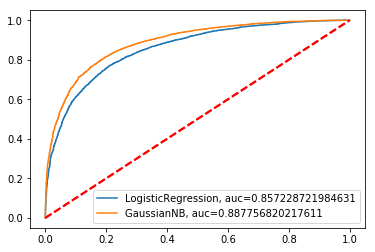

In [41]:
# Definindo uma lista com todos os modelos
classifiers = [
    LogisticRegression(solver='liblinear'),
    GaussianNB()]

# Rotina para instanciar, predizer e medir os resultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    
    # Plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

**Realizando os mesmos passos para o dataset de Test**

In [42]:
# Lendo e verificando os dados de teste
df_test = pd.read_csv(r'test.csv')

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [44]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [45]:
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [46]:
# Definição de dois DataFrames, um para variável target igual a "0s" e outro para "1s"
# para os dados de treino contidos no arquivo "train.csv"
df_train_target0 = df_train[df_train.target == 0]
df_train_target1 = df_train[df_train.target == 1]

# Balanceando os dados de treino
parameter = (df_train_target0.shape[0] / df_train_target1.shape[0])
df_train_target1 = pd.concat([df_train_target1]*round(parameter), ignore_index=True)
df_train_balanced = pd.concat([df_train_target0,df_train_target1])
df_train_balanced['target'].value_counts()

1    180882
0    179902
Name: target, dtype: int64

In [47]:
# Ajustando os dados de test para ter a mesma quantidade de linhas dos dados de treino
add_rows = df_train_balanced.shape[0] - df_test.shape[0]
df_test_balanced = pd.concat([df_test,df_test.sample(add_rows)])
(df_train_balanced.shape, df_test_balanced.shape)

((360784, 202), (360784, 201))

In [48]:
df_test_balanced.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [49]:
df_test_balanced.tail()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
106432,test_106432,13.3589,-1.2159,13.5482,8.0874,11.8773,-10.5723,5.7898,14.5492,6.5399,7.9395,-9.2864,-7.2510,13.9555,0.4912,9.3241,15.2368,10.6350,-6.7151,-1.8795,13.0220,9.5984,7.1463,5.6393,2.7024,5.7734,13.5958,-12.2629,-1.2269,3.7103,6.1670,-15.9336,10.2823,0.1301,9.9935,11.3530,0.9662,2.8689,8.9998,13.2572,-6.1495,-13.1082,6.3393,11.2217,12.0296,15.0128,-29.6420,7.9316,-2.1503,22.9548,26.5400,11.9563,15.4065,-5.1402,6.3440,-9.3943,9.8946,19.4409,6.7337,1.2175,8.5645,6.5703,-31.3067,-2.4354,3.6550,8.2673,-1.5696,6.5918,18.5434,5.0156,0.4426,22.0985,0.7520,2.9363,26.9300,18.8273,9.0325,6.3705,22.5595,9.9432,16.6024,10.3970,16.0399,-7.3252,17.9706,-6.0135,23.2077,7.0653,8.1707,8.7084,-3.8433,-17.8255,7.0110,14.3236,10.8347,10.5495,0.2805,19.6862,36.3761,1.7500,-0.0690,-5.2279,11.0416,14.5245,1.4828,14.9478,4.8744,8.3350,19.9268,14.4335,21.4013,6.5180,6.2324,5.0097,10.4971,2.5557,-1.0925,2.8215,13.6020,3.8622,12.2623,17.2442,9.1060,7.8446,1.7251,3.3061,12.7698,14.4175,-2.8989,2.2179,6.3204,12.6559,1.3003,7.5208,7.0228,-10.9137,7.9735,26.6182,10.0158,2.1698,-1.1472,-0.6871,2.2141,6.1096,14.9794,8.9415,6.0062,4.7243,2.8288,3.7431,0.2860,17.7469,8.3082,6.3262,18.9895,3.8888,-1.4622,13.3905,-8.0103,17.9961,5.5354,41.6481,5.5412,4.9065,12.0430,-12.9338,21.4825,2.5649,0.9854,4.5183,6.0957,3.1445,2.3483,8.4535,-3.6738,27.3104,7.5747,-8.0146,12.1733,-12.1722,3.5967,0.9296,8.0797,13.1088,2.4049,25.2814,0.7055,9.8311,-3.2757,9.7319,0.6503,10.4249,9.1415,4.4081,1.9255,19.4413,-1.5872,-3.8112,10.5648,17.5272,-12.0124
90976,test_90976,5.6449,-10.0009,9.8667,5.0486,8.6481,-4.6539,5.7933,15.9837,-0.9486,8.1301,-15.4638,-6.6199,13.9607,12.7134,5.0490,13.9641,11.2695,2.8142,20.2451,14.4482,19.8856,1.7365,4.8030,2.7016,15.3333,13.4919,-3.8940,-2.6984,5.5307,5.9095,-15.5961,10.5473,-3.6649,8.6490,10.6519,4.0346,9.9080,7.8798,4.4059,4.0342,-0.2787,3.1631,10.4705,11.4942,8.5752,-9.4737,11.4250,-13.7579,8.2077,19.8597,12.5603,1.0597,4.2994,6.4060,-17.7779,14.8342,19.1623,5.2613,3.5174,8.9108,8.2379,-15.7651,1.2163,-2.0163,9.8114,-3.6776,7.9368,13.2916,5.0162,-4.9438,40.1582,1.0557,-0.1224,17.1645,27.7449,15.5400,-7.4813,17.4339,5.0709,12.5063,6.6183,13.0941,-4.2398,-18.9490,-7.9526,21.0529,7.8281,23.2530,7.2866,2.1406,-18.3486,6.8130,10.0682,10.8116,8.6045,0.5748,3.1472,18.6282,2.1400,-3.6070,-8.4701,15.6636,11.3381,1.8422,9.7921,3.6124,2.5459,20.3288,14.3665,21.7308,3.7198,4.5084,1.2994,-1.7530,2.3743,0.3750,2.1641,9.8052,-20.4142,-2.6894,22.3138,13.4772,11.2854,-5.8146,8.4

In [50]:
# Definindo as variáveis explicativas e a variável target para o dataframe de treino balanceado
X_train = df_train_balanced.drop(['ID_code','target'], axis=1)
y_train = df_train_balanced.target

# Definindo as variáveis explicativas para o dataframe de teste balanceado
X_test = df_test_balanced.drop(['ID_code'], axis=1)

In [51]:
print(X_train.shape, y_train.shape, X_test.shape)

(360784, 200) (360784,) (360784, 200)


In [52]:
# Rodando uma regressão logística com o pacote sklearn
# instanciando o modelo
lr = LogisticRegression(solver='liblinear')
# ajustando o modelo com os dados de treino
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# calculando os preditos para os dados de teste
y_pred_proba_lr = lr.predict_proba(X_test)[::,1]

In [54]:
# Rodando o modelo Gaussian Naive Bayes
# instanciando o modelo
gnb = GaussianNB()
 # ajustando o modelo com os dados de treino
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
# calculando os preditos para os dados de teste
y_pred_proba_gnb = gnb.predict_proba(X_test)[::,1]

**Criando um arquivo de submissão no KAGGLE**

In [56]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = y_pred_proba_lr[0:200000]
submission.to_csv('submission_lr_proba.csv', index=False)

In [57]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = y_pred_proba_gnb[0:200000]
submission.to_csv('submission_gnb_proba.csv', index=False)

**Kaggle Results**

In [ ]:
# Submission and Description
# Private Score
# Public Score

# submission_lr_proba.csv
# Logistic Regression with probability submission.
# 0.86008
# 0.86043

# submission_gnb_proba.csv
# Gaussian Naive Bayes probability submission.
# 0.88763
# 0.88848

<br>
<img src="gnb_lr_proba_submission_result.png"/>
<br>